# **Übung 8: Numerische Lösung der Wellengleichung erster Ordnung**

In [303]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

### **8.1.1 Simulationsparameter**

In [304]:
# Konstant
m = 50              # Anzahl räumlicher Stützstellen
c = 1               # Ausbreitungsgeschwindigkeit

#### 🟠

In [305]:
# Diese Parameter können verändert werden
dt = 0.02          # Zeitschrittweite

In [306]:
total_time = 1.2 / abs(c)     # Simulationszeit
dx = 1 / m          # räumliche Schrittweite (auf 1m)
n = int(total_time / dt)

print("Räumlich:    ", m, "Stützstellen pro Meter ergibt eine räumliche Schritteweite von", "%.2f" % dx, "m")
print("Zeitlich:    ", dt, "s Zeitschrittweite über", total_time, "s ergibt", n, "Zeitschritte")

Räumlich:     50 Stützstellen pro Meter ergibt eine räumliche Schritteweite von 0.02 m
Zeitlich:     0.02 s Zeitschrittweite über 1.2 s ergibt 60 Zeitschritte


### **8.1.2 Gitterpunkte und Anfangslösung**

In [307]:
# Gitterpunkte 
x = np.linspace(0, 1, m + 1)   

# Lösungsmatrix für phi initialisieren:
#   - die räumliche Ausbreitung zum Zeitpunkt t ist in Spalte t untergebracht phi[:, t]
#   - die zeitliche Ausbreitung am Ort x ist in Reihe x untergebracht phi[x, :]
phi = np.zeros((m + 1, n + 1))   

# Anfangsbedingung
phi[:, 0] = np.cos(4 * np.pi * x) 

# Randbedingungen
phi[0, :] = 1           # phi_0,j = 1
phi[-1, :] = 1          # phi_m,j = 1

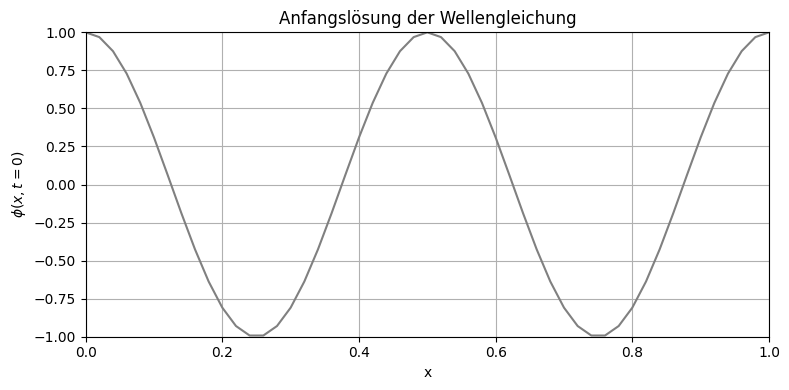

In [308]:
# Visualisierung der Anfangslösung
plt.figure(figsize=(8, 4))
plt.plot(x, phi[:, 0], color="gray")
plt.title('Anfangslösung der Wellengleichung')
plt.xlabel('x')
plt.ylabel(r'$\phi(x, t=0)$')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### **8.1.3 Löser Schleife**

In [309]:
# Aufwind-Schema (1. Ordnung) und zeitliche Vorwärtsdifferenz (1. Ordnung)
for j in range(0, n):
    for i in range(1, m):
        phi[i, j + 1] = phi[i, j] - dt * c / dx * (phi[i, j] - phi[i - 1, j])


In [310]:
# Animation der Lösung
def animation_phi():
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.set_title('Lösung der Wellengleichung')
    ax.plot(x, phi[:, 0], lw=2, color="gray", label='Anfangslösung')
    line, = ax.plot([], [], lw=2, color="firebrick", label='Lösung')
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\phi(x, t)$')
    ax.grid(True)
    ax.legend(loc="lower left")
    plt.tight_layout()

    def animate(j):
        line.set_data(x, phi[:, j])
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=n, interval=50, blit=True)
    plt.close(fig)
    return ani

In [311]:
ani = animation_phi()
HTML(ani.to_jshtml())

## **Aufgabe 1 a) Berechnungsvorschrift für zulässige Zeitschrittweite**

Ergänzen Sie das Programm um eine Berechnungsvorschrift für die zulässige Zeitschrittweite. Überprüfen Sie die Zeitschrittweitenberechnung durch Variation der relevanten Simulationsparameter (z.B. Ausbreitungsgeschwindigkeit c). Führen Sie anschließend die CFL-Zahl als frei wählbaren Parameter `clf` ein und stellen Sie ihren Einfluss auf die Lösung dar.

#### 🟠

In [312]:
c = 5               # Ausbreitungsgeschwindigkeit variieren

In [313]:
# Berechnungsvorschrift für dt
#    - der Zeitschritt muss limitiert werden, damit die Welle in der Zeit dt einen Weg <= dx zurücklegt
#    - für größere Werte von dt breitet sich Information räumlich schneller aus als sie zeitlich abgebildet werden kann
dt = dx / abs(c)

In [314]:
total_time = 1.2 / abs(c) 
n = int(total_time / dt)

print("Räumlich:    ", m, "Stützstellen pro Meter ergibt eine räumliche Schritteweite von", "%.2f" % dx, "m")
print("Zeitlich:    ", dt, "s Zeitschrittweite über", total_time, "s ergibt", n, "Zeitschritte")

Räumlich:     50 Stützstellen pro Meter ergibt eine räumliche Schritteweite von 0.02 m
Zeitlich:     0.004 s Zeitschrittweite über 0.24 s ergibt 60 Zeitschritte


In [315]:
# phi neu initialisieren, da sich die Anzahl der Zeitschritte n geändert haben könnte
phi = np.zeros((m + 1, n + 1))   

# AB und RB
phi[:, 0] = np.cos(4 * np.pi * x) 
phi[0, :] = 1     
phi[-1, :] = 1    

# Löser-Schleife
for j in range(0, n):
    for i in range(1, m):
        phi[i, j + 1] = phi[i, j] - dt * c / dx * (phi[i, j] - phi[i - 1, j])

ani = animation_phi()
HTML(ani.to_jshtml())

Die Berechnungsvorschrift `dt = dx / abs(c)` erzeugt für alle positiven Werte von c eine stabile Lösung. Man kann darauf basierend die CFL Zahl definieren:
\begin{equation}
CFL = c * \frac{\Delta t}{\Delta x}
\end{equation}
Damit ändert sich die Berechnungsvorschrift zu `dt = cfl * dx / abs(c)`.

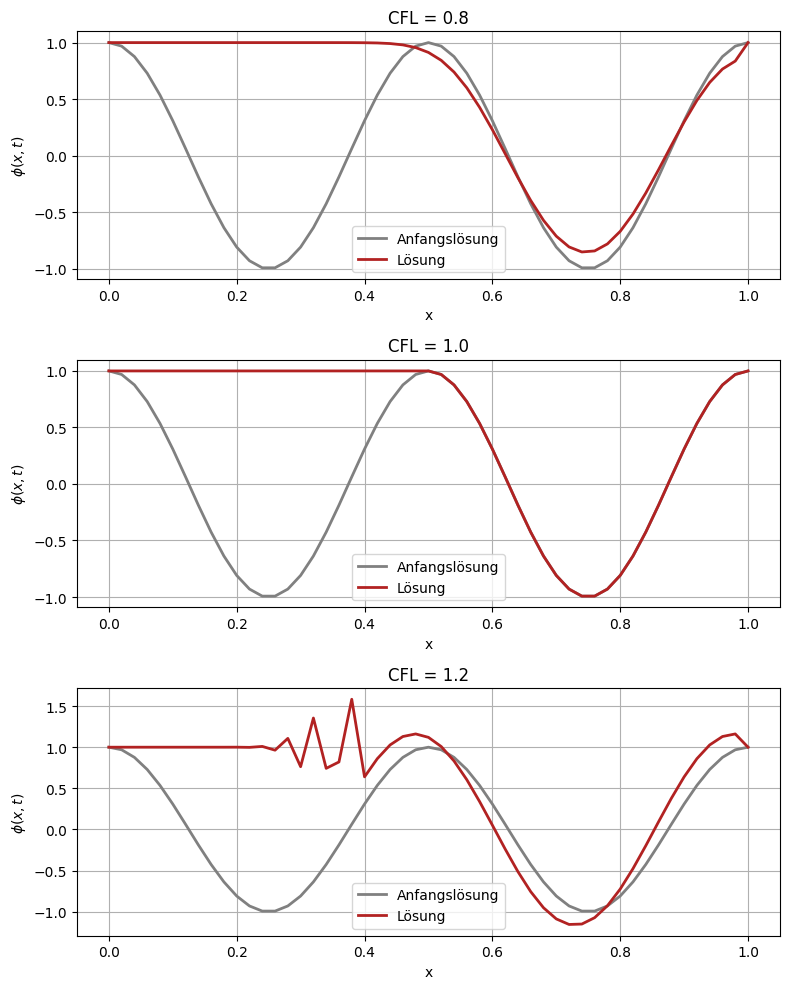

In [321]:
cfl_study = [0.8, 1.0, 1.2]
c = 1 

fig, axes = plt.subplots(3, 1, figsize=(8, 10))


for k, cfl in enumerate(cfl_study):
    # Simulationsparameter neu berechnen
    dt = cfl * dx / abs(c)
    total_time = 0.5 / abs(c) 
    n = int(total_time / dt)
    phi = np.zeros((m + 1, n + 1))   

    # AB und RB
    phi[:, 0] = np.cos(4 * np.pi * x) 
    phi[0, :] = 1     
    phi[-1, :] = 1    

    # Löser-Schleife: hier kann auch die CFL Zahl direkt implementiert werden
    for j in range(0, n):
        for i in range(1, m):
            phi[i, j + 1] = phi[i, j] - cfl * (phi[i, j] - phi[i - 1, j])

    
    axes[k].plot(x, phi[:, 0], lw=2, color="gray", label='Anfangslösung')
    axes[k].plot(x, phi[:, -1], lw=2, color="firebrick", label='Lösung')
    axes[k].set_title("CFL = {}".format(cfl))
    axes[k].set_xlabel('x')
    axes[k].set_ylabel(r'$\phi(x, t)$')
    axes[k].grid(True)
    axes[k].legend(loc="lower center")
plt.tight_layout()